In [4]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import time
import re
import requests
import time
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from datetime import datetime


### Obtaining the URL Link of the first page 

In [5]:
search_url =  "https://helpjuice.com/blog?page=2"
r = requests.get(search_url)
soup = BeautifulSoup(r.text, 'html.parser')
blogs = soup.find_all('div', class_ = 'post')

### Getting the blog names and blog links 

In [6]:
links =[]
blog_names = []
for blog in blogs:
    blog_name = blog.h3.text
    blog_link = blog.a['href']
    print(f'blog_name : {blog_name}')
    print(f'blog_link : {blog_link}')
    links.append(blog_link) 
    blog_names.append(blog_name)


blog_name : How to Create a Self-Service Knowledge Base for Your Business 
blog_link : /blog/self-service-knowledge-base
blog_name : How to Provide After-Hours Customer Support
blog_link : /blog/after-hours-customer-support
blog_name : Proactive Customer Service: Definition, Benefits & Best Practices
blog_link : /blog/proactive-customer-service
blog_name : Knowledge Process Outsourcing: Definition, Benefits & Best Practices
blog_link : /blog/knowledge-process-outsourcing
blog_name : Creating a Customer Service Knowledge Base for Better Support
blog_link : /blog/customer-service-knowledge-base
blog_name : 15 of the Best Zendesk Competitors and Alternatives [2022]
blog_link : /blog/zendesk-competitors-alternatives
blog_name : How to Write a Team Meeting Agenda: Best Practices & Templates
blog_link : /blog/meeting-agenda
blog_name : Business Process Outsourcing (BPO): Definition and Best Practices
blog_link : /blog/bpo
blog_name : Silo Mentality: What Are Organizational Silos and Their Im

### Iterating over the links and finding the Author Names , Date Published and it's content.

In [7]:
paras = []
Author =[]
date = []
for link in links:
    s = "https://helpjuice.com/"+link
    r = requests.get(s)
    soup = BeautifulSoup(r.text, 'html.parser')
    blog_Author = soup.h4.text
    blog_date = soup.span.text
    para = soup.article.text
    paras.append(para)
    Author.append(blog_Author)
    date.append(blog_date)
#print(paras)
#print(Author)
#print(date)
    

### Removing the stopwords by lemmatizing the paragraph so that we can use the words to find the keywords.

In [8]:
def text_preprocess_output(sentence):
    lemmatizer = WordNetLemmatizer()

    for i in range(len(sentence)):
        words = re.sub('[^a-zA-Z]', ' ', sentence[i]) 
        words = words.lower()
        words = words.split()
        words = [lemmatizer.lemmatize(word) for word in words if not word in stopwords.words('english')]
        sentence[i] = ' '.join(words)
        

In [9]:
text_preprocess_output(paras)

### Prints the top 3 words in each blogs 

In [10]:
for i in paras:
    words_inb_log = i.split()
    df = pd.DataFrame(words_inb_log)
    top3 = df.value_counts()[:3]
    print(f'top3 kewords: {top3}')

top3 kewords: customer     58
knowledge    53
base         49
dtype: int64
top3 kewords: customer    85
service     43
business    30
dtype: int64
top3 kewords: customer     126
service       48
proactive     38
dtype: int64
top3 kewords: kpo         63
provider    53
process     43
dtype: int64
top3 kewords: customer     104
knowledge     76
service       73
dtype: int64
top3 kewords: user        85
customer    78
tool        49
dtype: int64
top3 kewords: meeting    170
agenda      95
item        36
dtype: int64
top3 kewords: process        56
business       47
outsourcing    43
dtype: int64
top3 kewords: silo          45
department    27
employee      25
dtype: int64
top3 kewords: communication    58
team             44
async            34
dtype: int64
top3 kewords: confluence    47
team          35
project       34
dtype: int64
top3 kewords: customer    188
service     145
team         54
dtype: int64


In [11]:
ls =[]
for i in paras:
    words_inb_log = i.split()
    df = pd.DataFrame(words_inb_log)
    d = df.value_counts()[:3].reset_index(name='col')[0]
    ls.append(d)
    

### Storing the top 3 key words as a list 

In [12]:
l = []
for i in ls:
        w = ' '.join(i)
        l.append(w)
print(l)        

['customer knowledge base', 'customer service business', 'customer service proactive', 'kpo provider process', 'customer knowledge service', 'user customer tool', 'meeting agenda item', 'process business outsourcing', 'silo department employee', 'communication team async', 'confluence team project', 'customer service team']


### Spliting the name and storing it in a list

In [13]:
Blog_author =[]
for i in Author:
    Blog_author.append(i.split(":")[1])
print(Blog_author)    


[' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown']


### Spliting the date and storing in a list

In [14]:
Blog_date =[]
for i in date:
    Blog_date.append(i.split(":")[1])
print(Blog_date)    

[' March 02 2022', ' March 02 2022', ' February 28 2022', ' February 25 2022', ' February 23 2022', ' February 13 2022', ' February 11 2022', ' February 11 2022', ' February 11 2022', ' February 02 2022', ' January 24 2022', ' January 22 2022']


In [15]:
l

['customer knowledge base',
 'customer service business',
 'customer service proactive',
 'kpo provider process',
 'customer knowledge service',
 'user customer tool',
 'meeting agenda item',
 'process business outsourcing',
 'silo department employee',
 'communication team async',
 'confluence team project',
 'customer service team']

In [20]:
def convertdate(dstring):
      return datetime.strptime(dstring, ' %B %d %Y')
df = pd.DataFrame(Blog_date)
df


0
0       March 02 2022
1       March 02 2022
2    February 28 2022
3    February 25 2022
4    February 23 2022
5    February 13 2022
6    February 11 2022
7    February 11 2022
8    February 11 2022
9    February 02 2022
10    January 24 2022
11    January 22 2022

In [21]:
df["Title"] = blog_names
df['Author'] = Blog_author
df['date'] = df[0].apply(lambda x: convertdate(x))
df['key_words'] = l 
df['paras'] = paras


del df[0]
df

Title       Author       date  \
0   How to Create a Self-Service Knowledge Base fo...   Josh Brown 2022-03-02   
1         How to Provide After-Hours Customer Support   Josh Brown 2022-03-02   
2   Proactive Customer Service: Definition, Benefi...   Josh Brown 2022-02-28   
3   Knowledge Process Outsourcing: Definition, Ben...   Josh Brown 2022-02-25   
4   Creating a Customer Service Knowledge Base for...   Josh Brown 2022-02-23   
5   15 of the Best Zendesk Competitors and Alterna...   Josh Brown 2022-02-13   
6   How to Write a Team Meeting Agenda: Best Pract...   Josh Brown 2022-02-11   
7   Business Process Outsourcing (BPO): Definition...   Josh Brown 2022-02-11   
8   Silo Mentality: What Are Organizational Silos ...   Josh Brown 2022-02-11   
9   Asynchronous Communications 101: Definition, B...   Josh Brown 2022-02-02   
10  10 Confluence Alternatives for Great Team Coll...   Josh Brown 2022-01-24   
11            How to Create a Customer Service Policy   Josh Brown 2022-01-22   

                       key_words  \
0        customer knowledge base   
1      customer service business   
2     customer service proactive   
3           kpo provider process   
4     customer knowledge service   
5             user customer tool   
6            meeting agenda item   
7   process business outsourcing   
8       silo department employee   
9       communication team async   
10       confluence team project   
11         customer service team   

                                                paras  
0   customer today seek thing question answered pr...  
1   one question important customer support value ...  
2   consumer today expect brand ever gravitate tow...  
3   becoming relentlessly driven data often key ma...  
4   every owner know delivering top notch customer...  
5   looking tool help manage customer inquiry serv...  
6   told meeting waste time would believe u fact e...  
7   juggling many moving part within growing busin...  
8   picture jeff marketing waging silent war year ...  
9   effective internal communication cornerstone h...  
10  following post taking look confluence confluen...  
11  delivering killer customer service top priorit...

In [22]:
df.loc[:,['Title','Author','date','key_words']].to_excel('blog_data_p2.xlsx' ,index=False)

### Checking the condition for building the word cloud 

In [18]:
months = df[(df['date']>'2020-12-31') & (df['date']<'2022-04-01')]

months

Title       Author       date  \
0   How to Create a Self-Service Knowledge Base fo...   Josh Brown 2022-03-02   
1         How to Provide After-Hours Customer Support   Josh Brown 2022-03-02   
2   Proactive Customer Service: Definition, Benefi...   Josh Brown 2022-02-28   
3   Knowledge Process Outsourcing: Definition, Ben...   Josh Brown 2022-02-25   
4   Creating a Customer Service Knowledge Base for...   Josh Brown 2022-02-23   
5   15 of the Best Zendesk Competitors and Alterna...   Josh Brown 2022-02-13   
6   How to Write a Team Meeting Agenda: Best Pract...   Josh Brown 2022-02-11   
7   Business Process Outsourcing (BPO): Definition...   Josh Brown 2022-02-11   
8   Silo Mentality: What Are Organizational Silos ...   Josh Brown 2022-02-11   
9   Asynchronous Communications 101: Definition, B...   Josh Brown 2022-02-02   
10  10 Confluence Alternatives for Great Team Coll...   Josh Brown 2022-01-24   
11            How to Create a Customer Service Policy   Josh Brown 2022-01-22   

                       key_words  \
0        customer knowledge base   
1      customer service business   
2     customer service proactive   
3           kpo provider process   
4     customer knowledge service   
5             user customer tool   
6            meeting agenda item   
7   process business outsourcing   
8       silo department employee   
9       communication team async   
10       confluence team project   
11         customer service team   

                                                paras  
0   customer today seek thing question answered pr...  
1   one question important customer support value ...  
2   consumer today expect brand ever gravitate tow...  
3   becoming relentlessly driven data often key ma...  
4   every owner know delivering top notch customer...  
5   looking tool help manage customer inquiry serv...  
6   told meeting waste time would believe u fact e...  
7   juggling many moving part within growing busin...  
8   picture jeff marketing waging silent war year ...  
9   effective internal communication cornerstone h...  
10  following post taking look confluence confluen...  
11  delivering killer customer service top priorit...

### WORD CLOUD

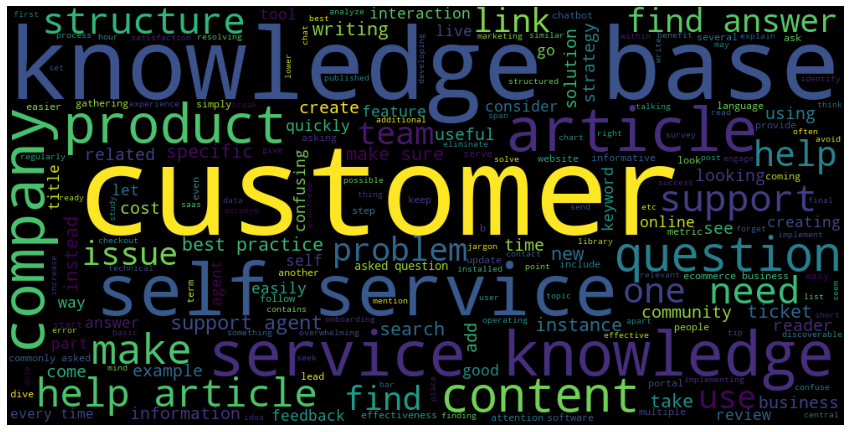

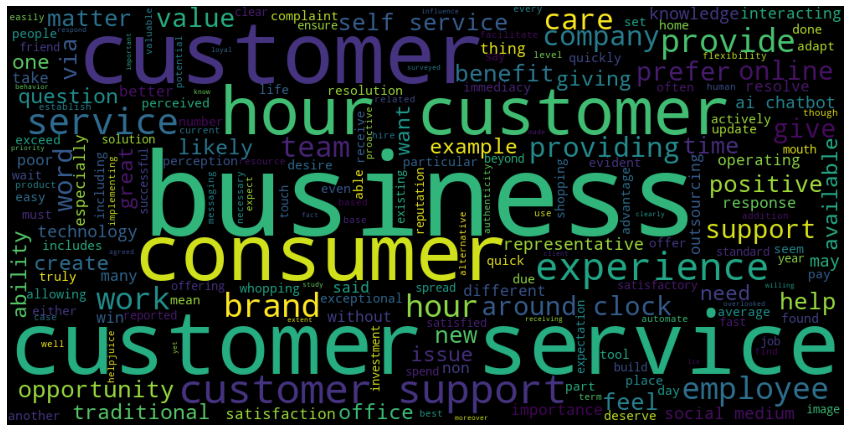

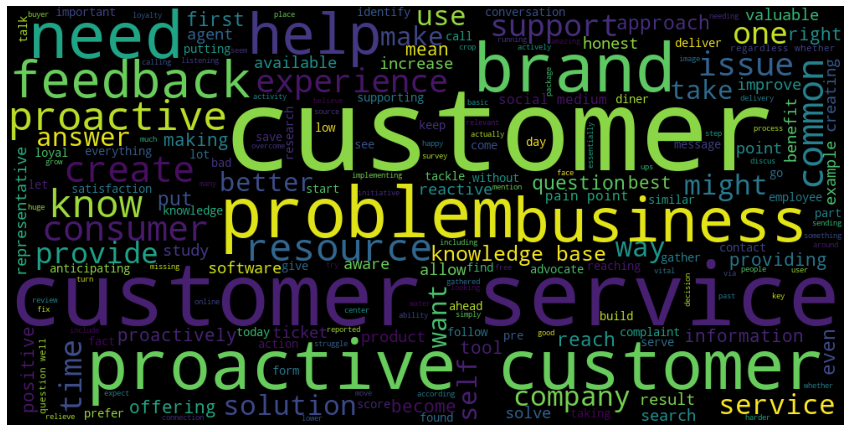

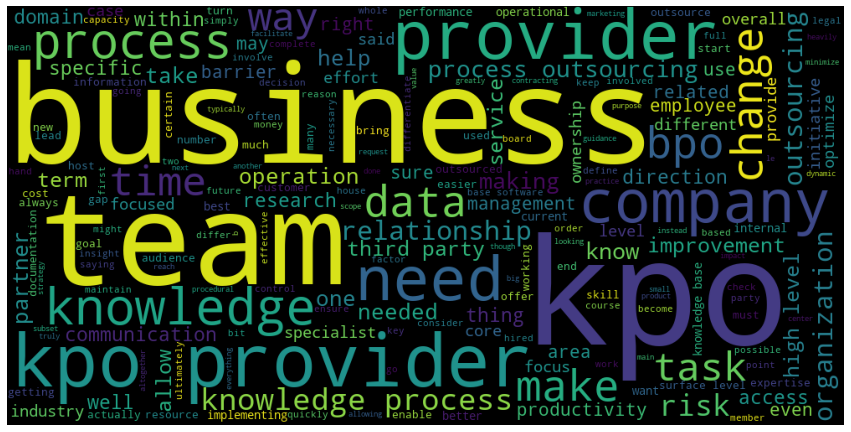

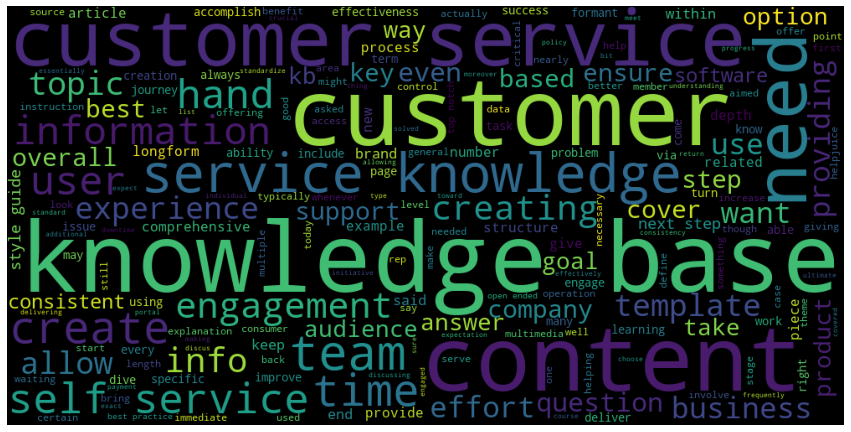

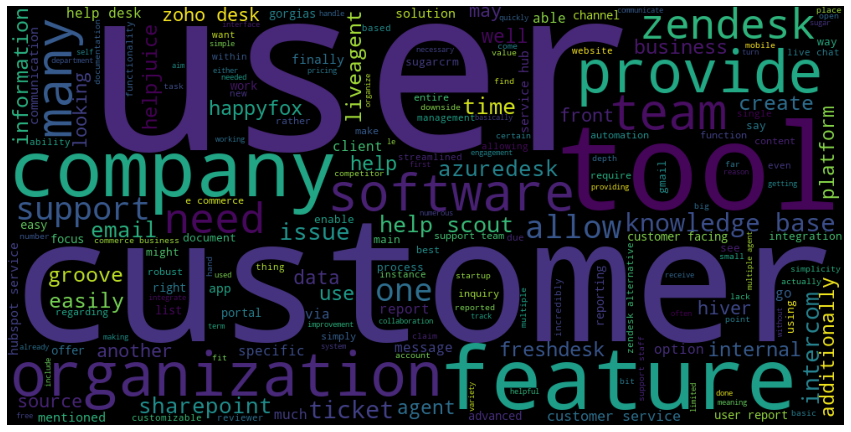

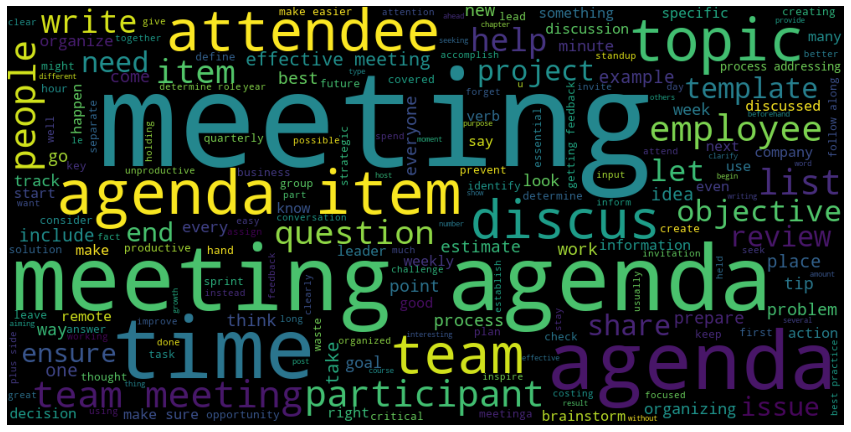

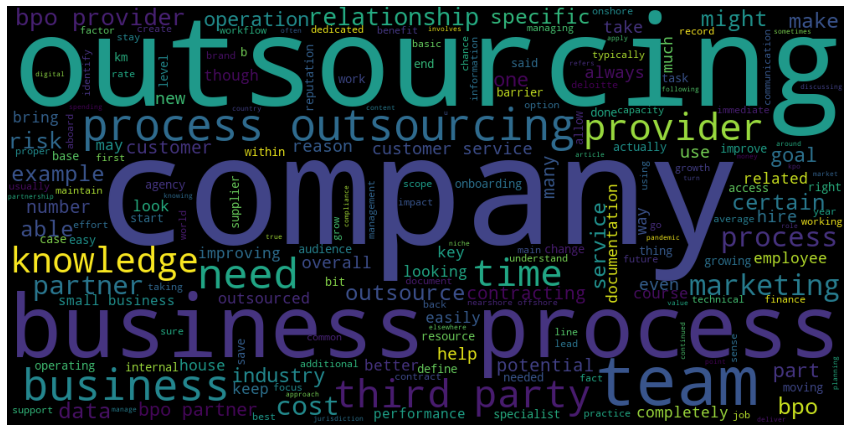

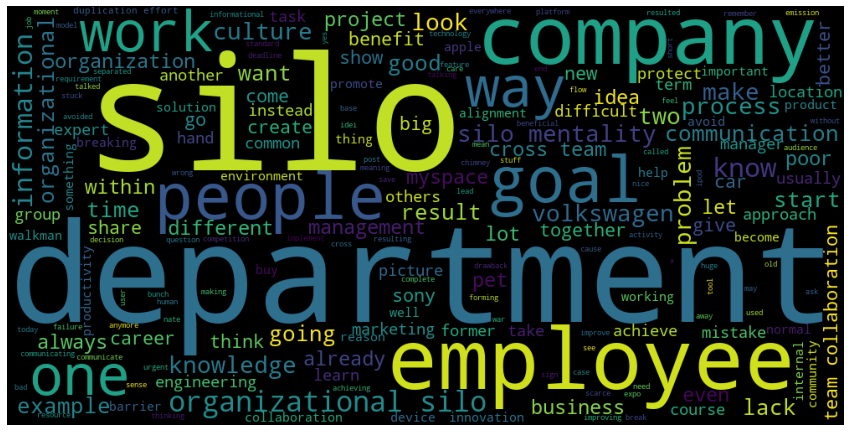

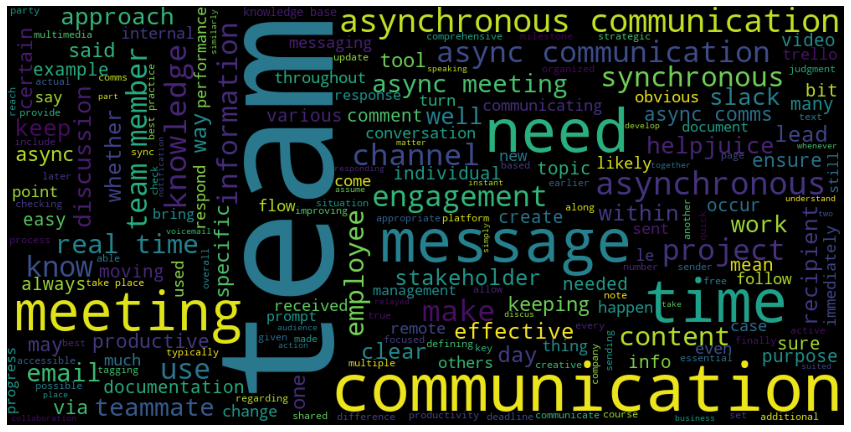

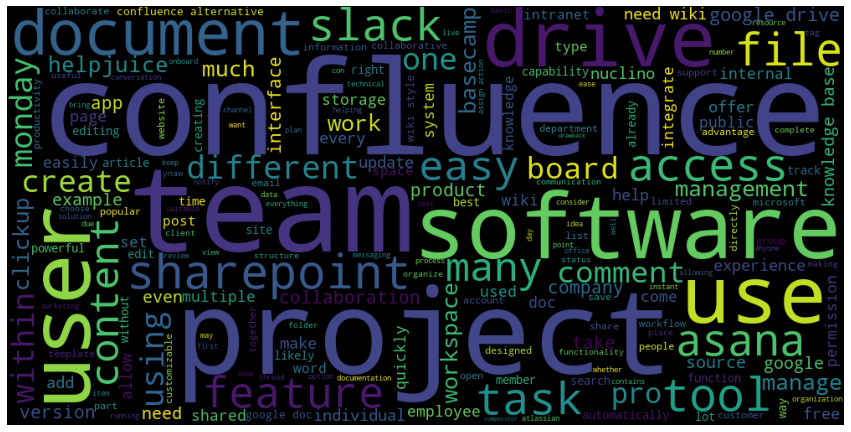

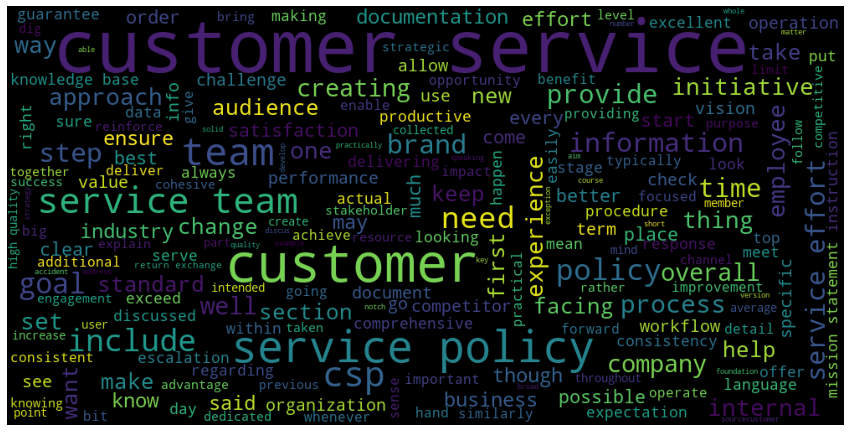

In [19]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
for i in df['paras']:
    wordcloud = WordCloud(width = 1000, height = 500).generate(i)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    #plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    #plt.close()